<a href="https://colab.research.google.com/github/agungadi/02_praktikum_web_lanjut_dua/blob/master/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Hubungkan gdrive ke google colab dengan mount.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

## 2. [C] Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.


In [3]:
def convolution2d(image, kernel, stride, padding):

    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    yKernShape = kernel.shape[0]
    xKernShape = kernel.shape[1]
    yImgShape = image.shape[0]
    xImgShape = image.shape[1]

    # Shape of Output Convolution
    yOutput = int(((yImgShape - yKernShape) / stride) + 1)
    xOutput = int(((xImgShape - xKernShape) / stride) + 1)
    output = np.zeros((xOutput, yOutput))

    # new_image = np.zeros((output_height, output_width)).astype(np.float32)


      # convolution 2D process
    for y in range(0, yOutput):
      for x in range(0, xOutput):
        output[y][x] = np.sum(image[y * stride:y * stride + yKernShape, x * stride:x * stride + xKernShape] * kernel)
        
    return output


## 2. [D] Load citra yang akan diproses dan ubah menjadi citra keabuan.


In [4]:
# No 2. d. Load citra yang akan diproses dan ubah menjadi citra keabuan.
img = cv.imread('/content/drive/MyDrive/Polinema/PCVK/Images/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

## 2. [E] Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil konvolusinya:

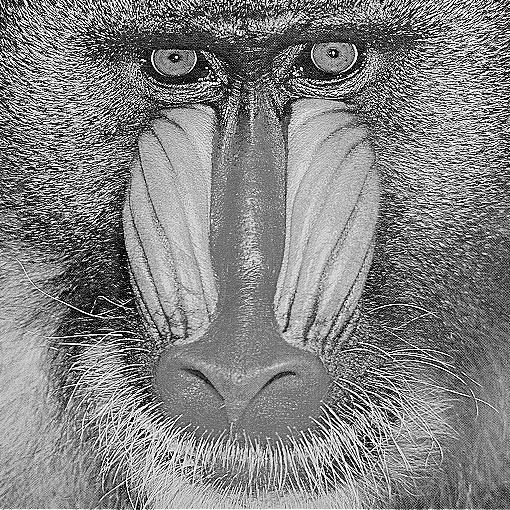

In [5]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))

## 3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter berikut

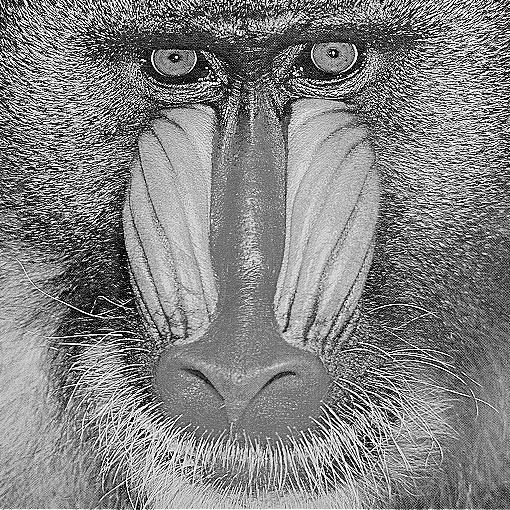

In [6]:
# operasi Sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

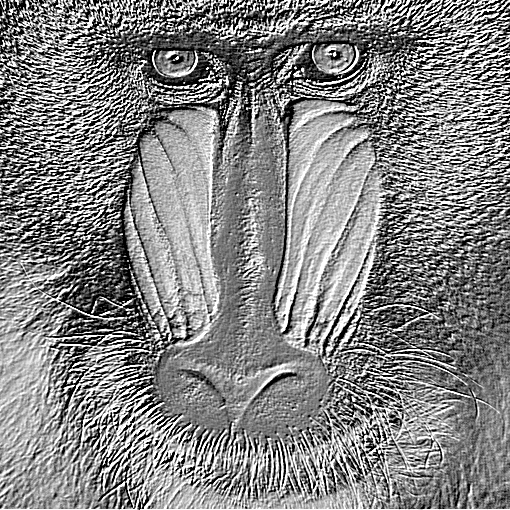

In [7]:
# operasi emboss
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

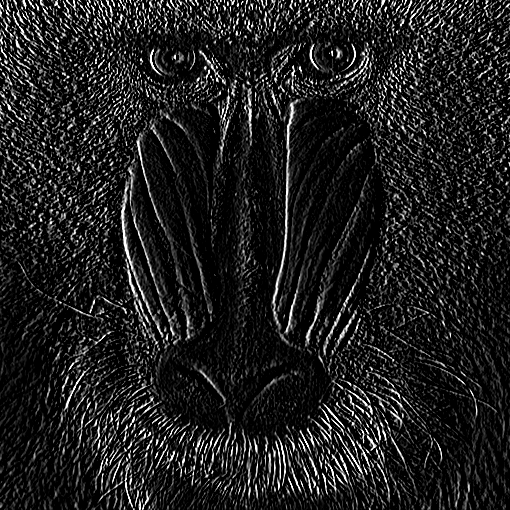

In [8]:
# operasi left sobel edge detection
kernel_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])

cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

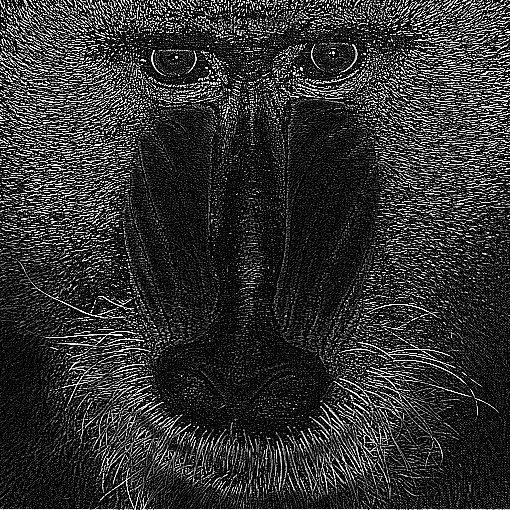

In [9]:
# operasi canny edge detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray, kernel_canny, 1, 2))

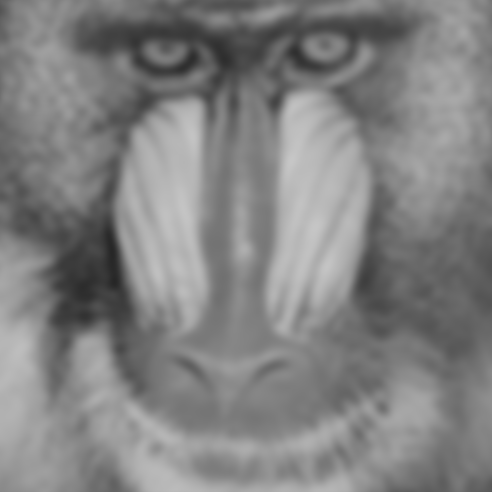

In [10]:
# operasi 21x21 gaussian blur

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))